## Наименование проекта

Статистический анализ данных сервиса аренды самокатов GoFast

## Описание проекта

Нам передали данные о некоторых пользователях сериса GoFast из нескольких городов, а также об их поездках. 

Цель проекта - проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
1) без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

2) с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

## Гипотезы

1) Тратят ли пользователи с подпиской больше времени на поездки?

2) Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката?

3) Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
riders = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'], dayfirst=True)
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
riders.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [7]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


## Предобработка данных

In [10]:
#создадим новый столбец с месяцами
riders['month'] = pd.DatetimeIndex(riders['date']).month
riders['month']

0         1
1         1
2         4
3         8
4         8
         ..
18063    11
18064    11
18065    11
18066    11
18067    12
Name: month, Length: 18068, dtype: int64

In [11]:
#выведем кол-во пропусков в таблицах
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [12]:
riders.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [13]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [14]:
#выведем кол-во дубликатов в таблицах
users.duplicated().sum()

31

In [15]:
#удалим строки-дубликаты и вернем индексацию
users = users.drop_duplicates().reset_index()
users

,index,user_id,name,age,city,subscription_type
0,0,1,Кира,22,Тюмень,ultra
1,1,2,Станислав,31,Омск,ultra
2,2,3,Алексей,20,Москва,ultra
3,3,4,Константин,26,Ростов-на-Дону,ultra
4,4,5,Адель,28,Омск,ultra
...,...,...,...,...,...,...
1529,1529,1530,Ростислав,29,Сочи,free
1530,1530,1531,Никита,25,Пятигорск,free
1531,1531,1532,Алексей,26,Тюмень,free
1532,1532,1533,Степан,22,Краснодар,free


In [16]:
riders.duplicated().sum()

0

In [17]:
subscriptions.duplicated().sum()

0

**Вывод:**

В таблице 'riders' создали столбец 'month', отображающий в какой месяц каждый пользователь соврешал поездки.

Пропусков в таблицах не обнаружилось.
    
Зато в таблице 'users' нашлась 31 строка-дубликат, которые мы удалили.

## Исследовательский анализ данных

**Частота встречаемости городов**

Text(0.5, 1.0, 'Встречаемость городов')

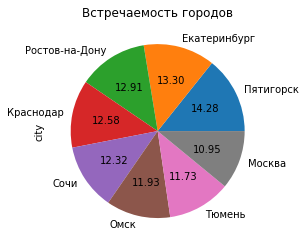

In [18]:
users['city'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Встречаемость городов')

На первый взгляд можно сказать, что города в таблице 'users' встречаются почти с одинаковой частотой. То есть пользователей из разных городов примерно одинаковое кол-во. Анализируя доли в процентах, видим, что все-таки чаще остальных в таблице встречается город Пятигорск (14.44%) (значит, тут чаще ездят на самокатах), реже - Москва (10.99%).

**Соотношение пользователей с подпиской и без подписки**

Text(0.5, 1.0, 'Соотношение пользователей с подпиской и без')

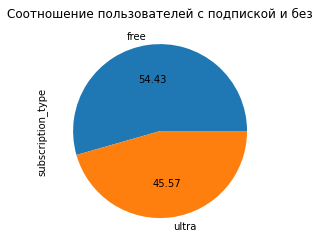

In [19]:
users['subscription_type'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Соотношение пользователей с подпиской и без')

Кол-во пользователей без подписки немного больше (54.06%), чем пользователей с подпиской 'ultra' (45.94%). Разница - почти 10%.

**Возраст пользователей**

Text(0.5, 1.0, 'Возраст пользователей')

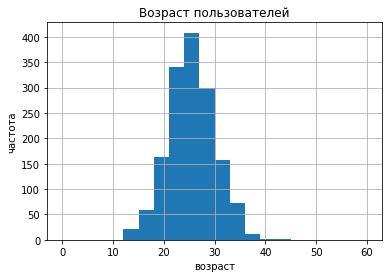

In [20]:
users['age'].hist(bins=20,range=(0,60))
plt.xlabel('возраст')
plt.ylabel('частота')
plt.title('Возраст пользователей')

По графику видим, что пользователи 20-30 лет чаще остальных пользуются самокатами. Двадцатипятилетние пользователи - чаще всех. Пользователи меньше 12 лет совсем не пользуются самокатами (возможно из-за возрастного ограничения). Наименьшее кол-во пользователей - 36 лет и старше. 

**Расстояние, которое пользователь преодолел за одну поездку**

Text(0.5, 1.0, 'Расстояние за 1 поездку')

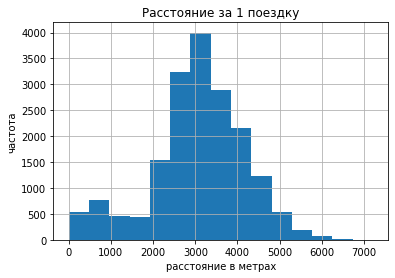

In [21]:
riders['distance'].hist(bins=15)
plt.xlabel('расстояние в метрах')
plt.ylabel('частота')
plt.title('Расстояние за 1 поездку')

Самая частая дистанция поездок на самокатах - 3 км. В целом пользователи берут самокаты для поездок на 2,5-4,5 км. График показывает небольшую долю поездок в 0 км. (возможно пользователи арендовали самокат и сразу передумывали). Более 6 км на самокатах почти никто не ездил.

**Продолжительность поездок**

Text(0.5, 1.0, 'Продолжительность 1 поездки')

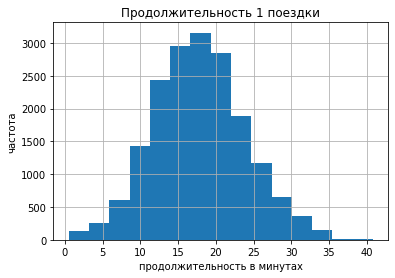

In [22]:
riders['duration'].hist(bins=15)
plt.xlabel('продолжительность в минутах')
plt.ylabel('частота')
plt.title('Продолжительность 1 поездки')

Средняя продолжительность поездок на самокатах составляет 15-20 минут. Меньше 1 минуты и больше 35 минут поездок практически не совершают.

**Вывод:**
    
По графикам мы выявили, что:

- больше всего пользователей проживают в городе Пятигорск (14.44%);

- кол-во пользователей с подпиской (45.94%) меньше чем пользователей без подписки (54,06%);

- средний возраст пользователей составляет 25 лет;

- за 1 поездку пользователь преодолевает в среднем 3 км.;

- среднее время 1 поездки составляет 15-20 мин.

## Объединение данных

In [23]:
#объединим 3 таблицы в одну (users + riders + subscriptions)
total = users.merge(riders, on='user_id', how='inner')
total_merged = total.merge(subscriptions, on='subscription_type', how='left')
total_merged['duration'] = np.ceil(total_merged['duration'])
total_merged

,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,0,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,0,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,0,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,0,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1533,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1533,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1533,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1533,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


In [24]:
#создадим новые датафреймы о пользователях с подпиской (ultra) и без (free)
free = total_merged[total_merged['subscription_type']=='free']
free.head()

,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,699,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,8,50,0
6501,699,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,8,50,0
6502,699,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,8,50,0
6503,699,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,8,50,0
6504,699,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,8,50,0


Text(0.5, 1.0, 'Расстояние за 1 поездку пользователей без подписки')

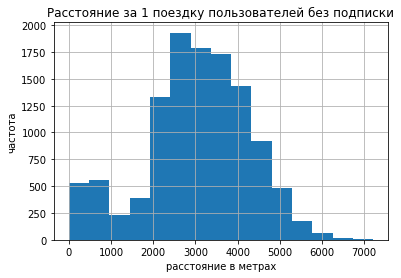

In [25]:
free['distance'].hist(bins=15)
plt.xlabel('расстояние в метрах')
plt.ylabel('частота')
plt.title('Расстояние за 1 поездку пользователей без подписки')

Пользователи без подписки обычно ездят на расстояния 2-4,2 км. Чаще всего - на 2,8 км. У этой категории отчетливо просматриваются очень короткие поездки на 0-1 км. Дальше 6 км пользователи без подписки почти не ездят.

Text(0.5, 1.0, 'Продолжительность 1 поездки пользователей без подписки')

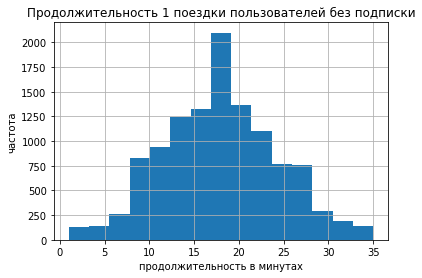

In [26]:
free['duration'].hist(bins=15)
plt.xlabel('продолжительность в минутах')
plt.ylabel('частота')
plt.title('Продолжительность 1 поездки пользователей без подписки')

Пользователи без подписки обычно ездят на самокатах 14-21 минут. Чаще всего - 17 минут. Дольше чем 35 минут поездок пользователями почти не осуществляется.

In [27]:
ultra = total_merged[total_merged['subscription_type']=='ultra']
ultra.head()

,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,0,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,0,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,0,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,0,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


Text(0.5, 1.0, 'Расстояние за 1 поездку пользователей с подпиской')

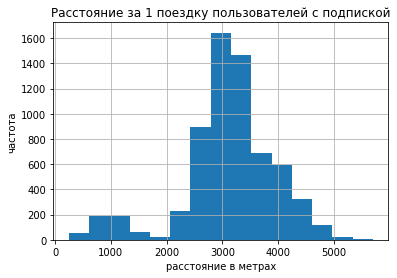

In [28]:
ultra['distance'].hist(bins=15)
plt.xlabel('расстояние в метрах')
plt.ylabel('частота')
plt.title('Расстояние за 1 поездку пользователей с подпиской')

Пользователи с подпиской обычно ездят на расстояния 2.5-3,5 км. Чаще всего - на 3 км. У этой категории совсем нет поездок на 0-0,2 км. Дальше 6 км пользователи без подписки почти не ездят.

Text(0.5, 1.0, 'Продолжительность 1 поездки пользователей с подпиской')

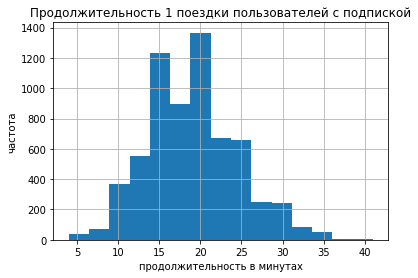

In [29]:
ultra['duration'].hist(bins=15)
plt.xlabel('продолжительность в минутах')
plt.ylabel('частота')
plt.title('Продолжительность 1 поездки пользователей с подпиской')

Пользователи с подпиской в среднем тратят на езду на самокате 14-21 минут. Чаще всего - 17 минут. Дольше чем 41 минуту пользователи почти не ездят на самоткатах.

**Вывод:**

На данном этапе мы объединили 3 таблицы в одну (users + riders + subscriptions) по общему столбцу 'user_id'. Далее создали еще 2 датафрейма, где разделили данные о пользователях с подпиской (ultra) и без (free).

Построив графики, мы увидели, что пользователи с подпиской ездят на чуть бóльшие расстояния чем пользователи без подписки и продолжительность поездок обоих категорий пользователей одинаковая.

## Подсчёт выручки

In [30]:
#создадим свобную таблицу и округлим значения в столбце 'duration'
pivot = total_merged.pivot_table(index=['user_id','month'],values=['distance','duration','subscription_type','start_ride_price','subscription_fee','minute_price'],aggfunc={'distance':'sum','duration':{'sum','count'},'subscription_type':'first','start_ride_price':'first','subscription_fee':'first','minute_price':'first'}).reset_index()
pivot.columns = ['user_id','month','distance','count','duration','minute_price','start_ride_price','subscription_fee','subscription_type']
pivot.head()

,user_id,month,distance,count,duration,minute_price,start_ride_price,subscription_fee,subscription_type
0,1,1,7027.511294,2,42.0,6,0,199,ultra
1,1,4,754.159807,1,7.0,6,0,199,ultra
2,1,8,6723.470560,2,46.0,6,0,199,ultra
3,1,10,5809.911100,2,32.0,6,0,199,ultra
4,1,11,7003.499363,3,56.0,6,0,199,ultra


In [33]:
#создадим столбец с выручкой
pivot['revenue'] = pivot['start_ride_price'] * pivot['count'] + pivot['minute_price'] * pivot['duration'] + pivot['subscription_fee']
pivot

,user_id,month,distance,count,duration,minute_price,start_ride_price,subscription_fee,subscription_type,revenue
0,1,1,7027.511294,2,42.0,6,0,199,ultra,451.0
1,1,4,754.159807,1,7.0,6,0,199,ultra,241.0
2,1,8,6723.470560,2,46.0,6,0,199,ultra,475.0
3,1,10,5809.911100,2,32.0,6,0,199,ultra,391.0
4,1,11,7003.499363,3,56.0,6,0,199,ultra,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,2,26.0,8,50,0,free,308.0
11327,1534,8,7622.453034,2,48.0,8,50,0,free,484.0
11328,1534,9,4928.173852,1,23.0,8,50,0,free,234.0
11329,1534,11,13350.015305,4,78.0,8,50,0,free,824.0


**Вывод:**

На основе общей таблицы мы создали сводную таблицу, где вывели продолжительность, расстояние, кол-во поездок и данные о типах подписки каждого пользователя в те месяцы, в которые были соврешены поездки на самокатах.
    
Далее мы почитали помесячную выручку каждого пользователя и добавили столбец 'revenue' в сводную таблицу.

## Проверка гипотез

**Гипотеза 1: пользователи с подпиской тратят больше времени на поездки**

Сформулируем гипотезы:
- Н(0) - время на поездки у пользователей с подпиской равно времени на поездки у пользователей без подписки;
- Н(1) - пользователи с подпиской тратят больше времени на поездки.

In [35]:
#создадим 2 выборки: длительность поездок у пользователей с подпиской и без
ultra_duration = ultra['duration']
ultra_duration

0       26.0
1       16.0
2        7.0
3       19.0
4       27.0
        ... 
6495    25.0
6496    16.0
6497    15.0
6498    16.0
6499    26.0
Name: duration, Length: 6500, dtype: float64

In [36]:
free_duration = free['duration']
free_duration

6500     15.0
6501     17.0
6502     21.0
6503     10.0
6504     18.0
         ... 
18063    20.0
18064    22.0
18065    19.0
18066    17.0
18067    16.0
Name: duration, Length: 11568, dtype: float64

In [37]:
#проведем двухвыборочный t-тест для независимых выборок

print('среднее выборки ultra:', np.mean(ultra_duration))
print('среднее выборки free:', np.mean(free_duration))

alpha = 0.05
results = st.ttest_ind(ultra_duration,free_duration,alternative='greater',equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее выборки ultra: 19.037692307692307
среднее выборки free: 17.890992392807746
p-значение: 1.1814679253701353e-36
Отвергаем нулевую гипотезу


Т.к. р-value оказалось меньше уровня статистической значимости (alpha), то можно сделать вывод, что наблюдаемое значение слишком далеко от предполагаемого в нулевой гипотезе. Среднее время на поездки у пользователей с подпиской больше времени на поездки чем у пользователей без подписки на 1 минуту 14 секунд. Поэтому нулевая гипотеза отвергается в пользу альтернативной: пользователи с подпиской тратят больше времени на поездки.

**Гипотеза 2: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров**

Сформулируем гипотезы:
- Н(0) - среднее расстояние поездки равно 3130 м
- Н(1) - среднее расстояние поездки больше 3130 м

In [38]:
#создадим выборку: расстояние поездок у пользователей с подпиской
ultra_distance = ultra['distance']
ultra_distance

0       4409.919140
1       2617.592153
2        754.159807
3       2694.783254
4       4028.687306
           ...     
6495    3973.046497
6496    3288.702563
6497    3076.159348
6498    4707.845501
6499    3202.890770
Name: distance, Length: 6500, dtype: float64

In [39]:
#проведем одновыборочный t-тест

print('среднее выборки ultra:', np.mean(ultra_distance))

value = 3130
alpha = 0.05
results = st.ttest_1samp(ultra_distance,value,alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее выборки ultra: 3115.4453880370247
p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Т.к. р-value оказалось больше уровня статистической значимости (alpha), то можно сделать вывод, что наблюдаемое значение достаточно близко к предполагаемому в нулевой гипотезе. Среднее расстояние, которое проезжают пользователи с подпиской, составило 3115 метров. Поэтому нулевая гипотеза не отвергается. 

**Гипотеза 3: будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**

Сформулируем гипотезы:
- Н(0) - выручка пользователей с подпиской равна выручке пользователей без подписки;
- Н(1) - выручка пользователей с подпиской больше чем пользователей без подписки.

In [40]:
#создадим 2 выборки: выручка у пользователей с подпиской и без
ultra_revenue = pivot[pivot['subscription_type']=='ultra']
ultra_revenue = ultra_revenue['revenue']
ultra_revenue

0       451.0
1       241.0
2       475.0
3       391.0
4       535.0
        ...  
4528    301.0
4529    469.0
4530    385.0
4531    295.0
4532    355.0
Name: revenue, Length: 4533, dtype: float64

In [41]:
free_revenue = pivot[pivot['subscription_type']=='free']
free_revenue = free_revenue['revenue']
free_revenue

4533     170.0
4534     962.0
4535     202.0
4536     178.0
4537     332.0
         ...  
11326    308.0
11327    484.0
11328    234.0
11329    824.0
11330    178.0
Name: revenue, Length: 6798, dtype: float64

In [42]:
#проведем двухвыборочный t-тест для независимых выборок

print('среднее выборки ultra:', np.mean(ultra_revenue))
print('среднее выборки free:', np.mean(free_revenue))

alpha = 0.05
results = st.ttest_ind(ultra_revenue,free_revenue,alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее выборки ultra: 362.7921906022502
среднее выборки free: 328.6413651073845
p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Т.к. р-value оказалось меньше уровня статистической значимости (alpha), то можно сделать вывод, что наблюдаемое значение слишком далеко от предполагаемого в нулевой гипотезе. Средняя помесячная выручка от пользователей с подпиской по месяцам больше выручки от пользователей без подписки на 34 руб. Поэтому нулевая гипотеза отвергается в пользу альтернативной: выручка пользователей с подпиской больше чем пользователей без подписки.

## Общий вывод

Цель проекта - проанализировать данные о поездках на самокатах пользователей из нескольких городов и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
________________

На этапе предобработки данных были выявлены около 30 строк-дубликатов в таблице 'users', которые в последствии были удалены.
Столбец 'date' в таблице 'riders' был приведен к типу даты pandas, чтобы далее создать новые стоблец 'month' со значениями месяцев использования самокатов пользователями.
Пропущенные значения в таблицах не обнаружилось.
________________

На этапе исследовательского анализа данных мы построили 5 различных графиков о пользователях и поездках.

Мы узнали что:
- больше всего пользователей проживают в городе Пятигорск (14.44%);
- кол-во пользователей с подпиской (45.94%) меньше чем пользователей без подписки (54,06%);
- средний возраст пользователей составляет 25 лет;
- за 1 поездку пользователь преодолевает в среднем 3 кс.;
- среднее время 1 поездки составляет 15-20 мин.
________________

Далее мы объединили все три таблицы ('riders', 'users', 'subscriptions') чтобы визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.

Выявили, что пользователи с подпиской ездят на чуть бóльшие расстояния чем пользователи без подписки (3 км. против 2.6 км.) и продолжительность поездок обоих категорий пользователей одинаковая (около 15-20 минут).

В общей таблице мы рассчитали столбец 'revenue', который отображал выручку по каждому пользователю за месяцы его использования самокатами.
________________

Итогом нашего анализа выступила проверка гипотез для увеличения количества пользователей с подпиской.
В процессе исследования мы выявили, что:
- пользователи с подпиской тратят больше времени на поездки чем пользователи без подписки;
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метр;
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.